# Your Off Facebook Activity Assignment
by Sloan Howard 

In this analysis, I will be using my off Facebook Activity from my Facebook profile information to find and compare univariate distributions and graph the information I get from the files. It will be interesting to see what sites and apps were used from my profile because I have not used the account in 7 years.

My hypothesis is that I will see some very old websites and applications from the years I used this Facebook account. I mainly used the account form 2009-2014 and have not logged in since. 

Below I am importing the neccessary tools needed to find unviariate distributions and be able to graph information.

In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

Here I am loading the json file "your_off_facebook_activity" into the notebook to be used for analysis.

In [6]:
with open(r"C:\Users\ADMIN\Desktop\ads_and_businesses\your_off-facebook_activity.json") as f:
    myfbact = json.load(f)
myfbact.keys()

dict_keys(['off_facebook_activity'])

Below I am using the for loop method to set a variable for each dictionary in the loaded json file. This makes sure that I get a series of lists that contain the data that I want to look at for this analysis. 

In [8]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in myfbact['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

Now I create an empty DataFrame and make the columns names each a dictionary from the data. I then assign the lists of data to the columns. 

In [12]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,studentaid.gov,4,0,0,0,0,0,4
1,vimeo.com,1,0,0,0,0,0,1
2,Tinder - Dating New People,16,16,0,0,0,0,0
3,DoorDash - Food Delivery,22,22,0,0,0,0,0
4,theupsstore.com,3,0,0,0,0,0,3


Above is a weird list of websites and apps. The list is weird to me because I used Facebook from around 2009-2014 and some of these apps did not exist between those years. My account is still active but I completely stopped using this social media platform nearly 7 years ago, so it is confusing to see these newer websites.

Below I import stats from scipy to see if I can plot some univariate distributions. 

In [9]:
from scipy import stats

In [44]:
univariation = np.array([appbyevent['Activate App'][:4], appbyevent['Custom'][:4]])
univariation

array([[ 0,  0, 16, 22],
       [ 0,  0,  0,  0]], dtype=int64)

As you can see below, I was having trouble try to use the contingency feature from stats. The error message says that the table the was created has a zero element at (0,0). I believe that this was a problem because of the lack of data on my account. I used Facebook during a time where there weren't many ads or apps that used facebook as a way to promote themselves. I never got the chance to use or click on them, which makes sense because most of the apps and sites you see in the data are fairly new.

In [45]:
stats.chi2_contingency(univariation)

ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

As I begin to see that not many old webistes are shown, I begin to just focus on apps and sites that have multiple events of multiple types from the list show below.  

In [21]:
app_table = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 10]
app_table

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
2,Tinder - Dating New People,16,16,0,0,0,0
3,DoorDash - Food Delivery,22,22,0,0,0,0
7,kent.edu,15,0,0,0,0,15
9,nba.com,11,0,4,0,0,7
24,NJ Advance Media,73,0,73,0,0,0
30,Kivvit,37,0,37,0,0,0
31,Advance Local,11,0,11,0,0,0
32,AdsHub Social,13,0,13,0,0,0
57,fubo.tv,19,0,0,0,0,19
78,TikTok,17,17,0,0,0,0


In [22]:
sub_obs = np.array(sub_apps.drop(columns = ['App', 'Event Count']))
sub_obs

array([[ 16,   0,   0,   0,   0],
       [ 22,   0,   0,   0,   0],
       [  0,   0,   0,   0,  15],
       [  0,   4,   0,   0,   7],
       [  0,  73,   0,   0,   0],
       [  0,  37,   0,   0,   0],
       [  0,  11,   0,   0,   0],
       [  0,  13,   0,   0,   0],
       [  0,   0,   0,   0,  19],
       [ 17,   0,   0,   0,   0],
       [124,  33,   0,   0,   0],
       [  0, 155,   0,   0,   0],
       [  0,  11,   0,   0,   0],
       [ 24,   0,   0,   0,   0]], dtype=int64)

In [23]:
stats.chi2_contingency(sub_obs)

ValueError: The internally computed table of expected frequencies has a zero element at (0, 2).

I again have trouble using the contingency feature as it is finding a plethora of zeros in my data. Again, I attribute this to the lack of data from the account. 

Once I see that I cannot plot univariate distributions, I wanted to sort the list of data by apps and websites and see what interesting information I can take from that. 

In [24]:
appbyevent.loc[appbyevent['App'] == "Tinder - Dating New People"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
2,Tinder - Dating New People,16,16,0,0,0,0,0


In [25]:
appbyevent.loc[appbyevent['App'] == "fubo.tv"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
57,fubo.tv,19,0,0,0,0,0,19


In [26]:
app_table['App']

2       Tinder - Dating New People
3         DoorDash - Food Delivery
7                         kent.edu
9                          nba.com
24                NJ Advance Media
30                          Kivvit
31                   Advance Local
32                   AdsHub Social
57                         fubo.tv
78                          TikTok
101         TikTok - Make Your Day
102                           Xbox
103    GOAT â Sneakers & Apparel
106     SoundCloud - Music & Audio
Name: App, dtype: object

Below I categorize each data point, determining whether it is an app or a website on the internet. Some of the data points I had never seen before so I categorized them as "unknown".

In [27]:
cat = ['app', 'app', 'site', 'site', 'unknown', 'site', 'unknown', 'unknown', 'site', 'app', 'app', 'site', 'site', 'site']
cat

['app',
 'app',
 'site',
 'site',
 'unknown',
 'site',
 'unknown',
 'unknown',
 'site',
 'app',
 'app',
 'site',
 'site',
 'site']

In [28]:
app_table['category'] = cat
app_table

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,category
2,Tinder - Dating New People,16,16,0,0,0,0,app
3,DoorDash - Food Delivery,22,22,0,0,0,0,app
7,kent.edu,15,0,0,0,0,15,site
9,nba.com,11,0,4,0,0,7,site
24,NJ Advance Media,73,0,73,0,0,0,unknown
30,Kivvit,37,0,37,0,0,0,site
31,Advance Local,11,0,11,0,0,0,unknown
32,AdsHub Social,13,0,13,0,0,0,unknown
57,fubo.tv,19,0,0,0,0,19,site
78,TikTok,17,17,0,0,0,0,app


Below, I then graph the information above to see which type has the most events. It seems that the websites have the advantage in all the graphs. 

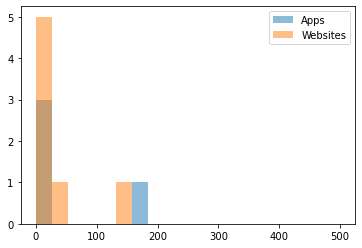

In [30]:
bins = np.linspace(0, 500, 20)
plt.hist(app_table['Event Count'].loc[app_table['category'] == 'app'], bins, alpha = 0.5, label = "Apps")
plt.hist(app_table['Event Count'].loc[app_table['category'] == 'site'], bins, alpha = 0.5, label = "Websites")
plt.legend(loc = 'upper right')
plt.show()

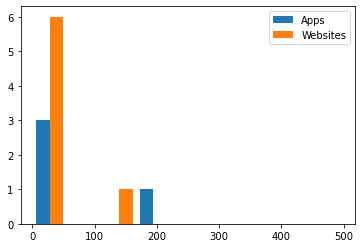

In [31]:
bins = np.linspace(0, 500, 10)
apps = app_table['Event Count'].loc[app_table['category'] == 'app']
sites = app_table['Event Count'].loc[app_table['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

In [32]:
eventcount = stats.ttest_ind(app_table['Event Count'].loc[app_table['category'] == 'app'], app_table['Event Count'].loc[app_table['category'] == 'site'])
eventcount.statistic

0.4413634016646444

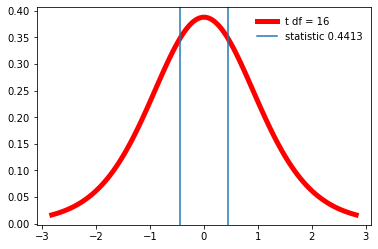

In [33]:
df1 = (len(apps) - 1) + (len(sites) - 1)
#df2 = 100
fig, ax1 = plt.subplots(1,1)
x1 = np.linspace(stats.t.ppf(0.01, df1), stats.t.ppf(0.99, df1), 100)
ax1.plot(x1, stats.t.pdf(x1, df1), 'r-', lw = 5, label = 't df = 16')
#x2 = np.linspace(stats.t.ppf(0.01, df2), stats.t.ppf(0.99, df2), 100)
#ax1.plot(x2, stats.t.pdf(x2, df2), 'k-', lw = 5, label = 't df = 100')
ax1.axvline(x=eventcount.statistic, label = 'statistic 0.4413')
ax1.axvline(x=-eventcount.statistic, label = '_nolegend_')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In [34]:
eventcount.pvalue

0.6693630861277924

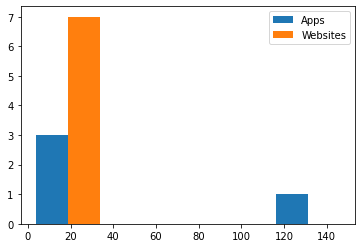

In [35]:
bins = np.linspace(0, 150, 5)
apps = app_table['Activate App'].loc[app_table['category'] == 'app']
sites = app_table['Activate App'].loc[app_table['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

In [40]:
ttest_activateapp = stats.ttest_ind(app_table['Activate App'].loc[app_table['category'] == 'app'], app_table['Activate App'].loc[app_table['category'] == 'site'])
ttest_activateapp

Ttest_indResult(statistic=2.0978087356114226, pvalue=0.06535024048907413)

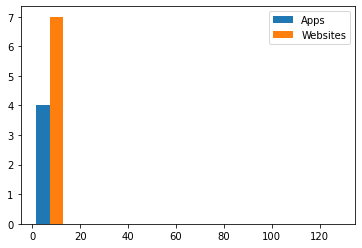

In [41]:
bins = np.linspace(0, 130, 10)
apps = app_table['View Content'].loc[app_table['category'] == 'app']
sites = app_table['View Content'].loc[app_table['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

In [43]:
ttest_viewcontent = stats.ttest_ind(app_table['View Content'].loc[app_table['category'] == 'app'], app_table['View Content'].loc[app_table['category'] == 'site'])
ttest_viewcontent

Ttest_indResult(statistic=nan, pvalue=nan)

In conclusion, I was sad that I was not able to figure out how to use the contigency feature from stats in scipy to find and plot univariate distributions. I feel like this would have been able to create more data to analyze and give me more of a conclusion to this data analysis. It was unfortunate to see the lack of data from my account, the arrays I was getting had a lot of zeros which led to me not being able to plot univariate distributions. What was interesting about this analysis is the amount of newer sites and apps that appeared in my data even though I have not used my account in 7 years! Sites like Tiktok, Doordash, and Tinder were apart of my data above. I am perplexed because all of these apps are on my phone and have no connection to Facebook at all! I was expecting to see some sites I had not seen in a long time, and I thought I could use that data to see what my off Facebook activity was and compare it to the data shared by my professor in class.